In [ ]:
import json
import os

# drive à importer : https://drive.google.com/drive/folders/1vn_RM47LA_HdpQwZqdwqNRPm7CXyeeV3?usp=sharing
# 
#1 chargement des datas

#Nous allons tester la classification binaire 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Définit le chemin vers le dossier contenant les différentes types de datas

###WhisperX

#whisperX 
folder_path_whisperX_ad = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX/ad"
folder_path_whisperX_cn = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX/cn"

#whisperX with segmented 30sec audios length
folder_path_whisperX_ad_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/ad"
folder_path_whisperX_cn_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/cn"

#whisperX with segmented 30sec audios length and whistespaces representation 
folder_path_whisperX_ad_ws_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/white_spaces_ad"
folder_path_whisperX_cn_ws_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/white_spaces_cn"


#whisperX with whistespaces representation 
folder_path_whisperX_ad_ws = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX/white_spaces_ad"
folder_path_whisperX_cn_ws = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX/white_spaces_cn"



###Whisper classic
folder_path_whisper_ad = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper/ad"
folder_path_whisper_cn = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper/cn"

###Whisper classic with segmented 30sec audios length
folder_path_whisper_ad_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper_seg/ad"
folder_path_whisper_cn_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper_seg/cn"



# # Liste tous les fichiers dans les 2 dossiers
# def list_files(folder_ad, folder_cn):
#   files = []
#   for data in [folder_ad, folder_cn]:
#       files.extend(os.listdir(data))    
#   return files   

# files_whisperX = list_files(folder_path_whisperX_ad, folder_path_whisperX_cn)
# print("taille whisperX files : ", len(files_whisperX))
# files_whisperX_seg = list_files(folder_path_whisperX_ad_seg, folder_path_whisperX_cn_seg)
# print("taille whisperX_seg files : ",len(files_whisperX_seg))
# files_whisperX_seg_ws = list_files(folder_path_whisperX_ad_ws_seg, folder_path_whisperX_cn_ws_seg)
# print("taille whisperX_seg_ws files : ",len(files_whisperX_seg_ws))
# files_whisperX_ws = list_files(folder_path_whisperX_ad_ws, folder_path_whisperX_cn_ws)
# print("taille whisperX_ws files : ",len(files_whisperX_ws))


# files_whisper = list_files(folder_path_whisper_ad, folder_path_whisper_cn)
# print("taille whisper files : ", len(files_whisper))
# files_whisper_seg = list_files(folder_path_whisper_ad_seg, folder_path_whisper_cn_seg)
# print("taille whisper_seg files : ", len(files_whisper_seg))

In [ ]:
def from_json_to_dict(folder_ad, folder_cn):
    data_ad = []
    data_cn = []
    for dir_path in [folder_ad, folder_cn]:
        for file_name in os.listdir(dir_path):
            if file_name.endswith('.json'):
                file_path = os.path.join(dir_path, file_name)
                with open(file_path, 'r') as f:
                    data = json.load(f)
                    if dir_path == folder_ad:
                        data_ad.append(data)
                    elif dir_path == folder_cn:
                        data_cn.append(data)
    return data_ad, data_cn             

                
whisperX_data_ad, whisperX_data_cn = from_json_to_dict(folder_path_whisperX_ad, folder_path_whisperX_cn)
whisperX_seg_data_ad, whisperX_seg_data_cn = from_json_to_dict(folder_path_whisperX_ad_seg, folder_path_whisperX_cn_seg)
whisperX_seg_ws_data_ad, whisperX_seg_ws_data_cn = from_json_to_dict(folder_path_whisperX_ad_ws_seg, folder_path_whisperX_cn_ws_seg)
whisperX_ws_data_ad, whisperX_ws_data_cn = from_json_to_dict(folder_path_whisperX_ad_ws, folder_path_whisperX_cn_ws)


whisper_seg_data_ad, whisper_seg_data_cn = from_json_to_dict(folder_path_whisper_ad_seg, folder_path_whisper_cn_seg)


In [ ]:
whisper_data_ad, whisper_data_cn = from_json_to_dict(folder_path_whisper_ad, folder_path_whisper_cn)

In [ ]:
from random import choice

print("\nexemple d'une data ad avec whisperX :\n ", choice(whisperX_data_ad))
print("\nexemple d'une data cn avec whisperX :\n ", choice(whisperX_data_cn))

print("\nexemple d'une data ad avec whisperX_ws :\n ", whisperX_ws_data_ad[1])


exemple d'une data ad avec whisperX :
  {'text': "Just to take a look at this picture and tell me everything that you see going on in the picture. Tell me everything that you see happening. Now, the girl's cooking, the girl's cooking, the boy's cooking and he's still a fellow when the cookies are spilled. These bills produce water. Worshindoishes. There's Worshindoishes drying them. They run over the sinks running over. Your feet can't go water. There must be a path out back. Fires, trees. I don't know what else. Water on the floor. Is that everything then? Yeah.", 'label': 1}

exemple d'une data cn avec whisperX :
  {'text': "I'm going to go ahead and show you all of the action. There's a boy reaching, he's on a stool, reaching for a cookie, and the stool is ready to fall over. He's got one hand in the cookie jar, and he's got a cookie in the left hand. There's a girl standing beside him. Go ahead. And she's reaching for the coquina gas in her hand, and she has her right finger up to

In [ ]:
#delete des keys autre que 'text' et 'label'
keys_to_keep = ['text', 'label']

def delete_keys(d, keys_to_keep):
    for key in list(d.keys()):
        if key not in keys_to_keep:
            del d[key]

for data in (whisperX_data_ad + whisperX_data_cn + \
             whisperX_seg_data_ad + whisperX_seg_data_cn + \
             whisperX_seg_ws_data_ad + whisperX_seg_ws_data_cn +\
             whisperX_ws_data_ad + whisperX_ws_data_cn +\
             whisper_seg_data_ad + whisper_seg_data_cn +\
             whisper_data_ad + whisper_data_cn):
    delete_keys(data, keys_to_keep)
    

In [ ]:
# nous avons 6 types de données différentes, on leur attribue un numéros pour la lisibilité des variables:
# 0 : whisper
# 1 : whisper_seg

# 2 : whisperX
# 3 : whisperX_seg
# 4 : whisperX_seg_ws
# 5 : whisperX_ws

from sklearn.model_selection import train_test_split

data_0 = whisper_data_ad + whisper_data_cn
data_1 = whisper_seg_data_ad + whisper_seg_data_cn 
data_2 =whisperX_data_ad + whisperX_data_cn
data_3 = whisperX_seg_data_ad + whisperX_seg_data_cn
data_4 = whisperX_seg_ws_data_ad + whisperX_seg_ws_data_cn
data_5 = whisperX_ws_data_ad + whisperX_ws_data_cn

texts_0, labels_0 = zip(*[(d['text'], d['label']) for d in data_0])
texts_1, labels_1 = zip(*[(d['text'], d['label']) for d in data_1])
texts_2, labels_2 = zip(*[(d['text'], d['label']) for d in data_2])
texts_3, labels_3 = zip(*[(d['text'], d['label']) for d in data_3])
texts_4, labels_4 = zip(*[(d['text'], d['label']) for d in data_4])
texts_5, labels_5 = zip(*[(d['text'], d['label']) for d in data_5])

x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(texts_0, labels_0, random_state = 0, stratify = labels_0)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(texts_1, labels_1, random_state = 0, stratify = labels_1)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(texts_2, labels_2, random_state = 0, stratify = labels_2)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(texts_3, labels_3, random_state = 0, stratify = labels_3)
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(texts_4, labels_4, random_state = 0, stratify = labels_4)
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(texts_5, labels_5, random_state = 0, stratify = labels_5)

In [ ]:
!pip install transformers
#!pip install tensorflow_hub
!pip install tensorflow_text
from transformers import BertTokenizer, TFBertModel

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#bert_model = TFBertModel.from_pretrained("bert-base-uncased")
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# # Bert layers
# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
# preprocessed_text = bert_preprocess(text_input)
# outputs = bert_encoder(preprocessed_text)

# # Neural network layers
# l = tf.keras.layers.Dropout(0.01, name="dropout")(outputs['pooled_output'])
# l2 = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# # Use inputs and outputs to construct a final model
# model = tf.keras.Model(inputs=[text_input], outputs = [l2])

def build_classifier_model():
  bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", name='preprocessing')
  bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True, name='BERT_encoder')
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = bert_preprocess
  encoder_inputs = preprocessing_layer(text_input)
  encoder = bert_encoder
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation="sigmoid", name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
#model_0 = build_classifier_model()
#model_1 = build_classifier_model()
model_2 = build_classifier_model()
model_3 = build_classifier_model()
model_4 = build_classifier_model()
#model_5 = build_classifier_model()
model_2.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
!pip install -q tf-models-official

from official.nlp import optimization

# loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

epochs = 20
steps_per_epoch = 200
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)
init_lr = 3e-5
# METRICS = [
#       tf.keras.metrics.Accuracy(name='accuracy'),
#       tf.keras.metrics.Precision(name='precision'),
#       tf.keras.metrics.Recall(name='recall')
# ]
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


In [ ]:
#training models 2
model_2.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)
model_2.fit(x_train_2, y_train_2, epochs=epochs)

Epoch 1/20
4/4 [==============================] - 45s 962ms/step - loss: 0.7454 - binary_accuracy: 0.5081
Epoch 2/20
4/4 [==============================] - 3s 833ms/step - loss: 0.7175 - binary_accuracy: 0.4919
Epoch 3/20
4/4 [==============================] - 3s 832ms/step - loss: 0.7140 - binary_accuracy: 0.5161
Epoch 4/20
4/4 [==============================] - 4s 890ms/step - loss: 0.6985 - binary_accuracy: 0.5242
Epoch 5/20
4/4 [==============================] - 3s 839ms/step - loss: 0.6918 - binary_accuracy: 0.5242
Epoch 6/20
4/4 [==============================] - 3s 844ms/step - loss: 0.6650 - binary_accuracy: 0.5968
Epoch 7/20
4/4 [==============================] - 4s 897ms/step - loss: 0.6641 - binary_accuracy: 0.6371
Epoch 8/20
4/4 [==============================] - 3s 842ms/step - loss: 0.6565 - binary_accuracy: 0.5726
Epoch 9/20
4/4 [==============================] - 3s 844ms/step - loss: 0.6353 - binary_accuracy: 0.6129
Epoch 10/20
4/4 [==============================] - 4s 

In [ ]:
#training models 3
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')
model_3 = build_classifier_model()
model_3.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)
model_3.fit(x_train_3, y_train_3, epochs=epochs)

Epoch 1/20
12/12 [==============================] - 53s 976ms/step - loss: 0.6950 - binary_accuracy: 0.6260
Epoch 2/20
12/12 [==============================] - 12s 991ms/step - loss: 0.5918 - binary_accuracy: 0.6979
Epoch 3/20
12/12 [==============================] - 11s 940ms/step - loss: 0.5273 - binary_accuracy: 0.7526
Epoch 4/20
12/12 [==============================] - 11s 904ms/step - loss: 0.4369 - binary_accuracy: 0.8411
Epoch 5/20
12/12 [==============================] - 11s 918ms/step - loss: 0.3368 - binary_accuracy: 0.9036
Epoch 6/20
12/12 [==============================] - 11s 900ms/step - loss: 0.2674 - binary_accuracy: 0.9193
Epoch 7/20
12/12 [==============================] - 11s 901ms/step - loss: 0.1825 - binary_accuracy: 0.9531
Epoch 8/20
12/12 [==============================] - 11s 911ms/step - loss: 0.1326 - binary_accuracy: 0.9635
Epoch 9/20
12/12 [==============================] - 11s 916ms/step - loss: 0.1257 - binary_accuracy: 0.9661
Epoch 10/20
12/12 [=========

In [ ]:
#training models 4
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')
model_4 = build_classifier_model()
model_4.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)
model_4.fit(x_train_4, y_train_4, epochs=epochs)

Epoch 1/20
12/12 [==============================] - 36s 907ms/step - loss: 0.6448 - binary_accuracy: 0.8203
Epoch 2/20
12/12 [==============================] - 11s 903ms/step - loss: 0.4552 - binary_accuracy: 0.7995
Epoch 3/20
12/12 [==============================] - 11s 933ms/step - loss: 0.2211 - binary_accuracy: 0.9271
Epoch 4/20
12/12 [==============================] - 11s 915ms/step - loss: 0.1241 - binary_accuracy: 0.9557
Epoch 5/20
12/12 [==============================] - 11s 928ms/step - loss: 0.0882 - binary_accuracy: 0.9661
Epoch 6/20
12/12 [==============================] - 11s 895ms/step - loss: 0.0619 - binary_accuracy: 0.9818
Epoch 7/20
12/12 [==============================] - 11s 909ms/step - loss: 0.0388 - binary_accuracy: 0.9870
Epoch 8/20
12/12 [==============================] - 11s 921ms/step - loss: 0.0317 - binary_accuracy: 0.9818
Epoch 9/20
12/12 [==============================] - 11s 909ms/step - loss: 0.0300 - binary_accuracy: 0.9896
Epoch 10/20
12/12 [=========

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

model_2.evaluate(x_test_2, y_test_2)

2/2 [==============================] - 2s 118ms/step - loss: 0.5516 - binary_accuracy: 0.7143


[0.5516329407691956, 0.7142857313156128]

In [ ]:
model_3.evaluate(x_test_3, y_test_3)

5/5 [==============================] - 2s 251ms/step - loss: 1.6139 - binary_accuracy: 0.7209


[1.6138954162597656, 0.7209302186965942]

In [ ]:
model_4.evaluate(x_test_4, y_test_4)

5/5 [==============================] - 3s 290ms/step - loss: 1.5625 - binary_accuracy: 0.7752


[1.5625059604644775, 0.7751938104629517]

5/5 [==============================] - 1s 304ms/step


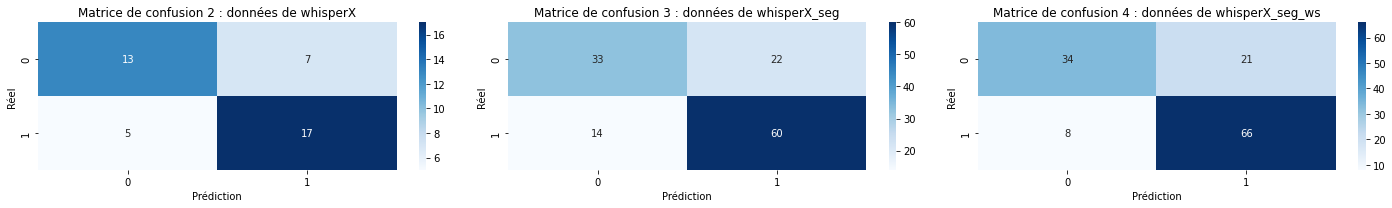

In [ ]:
y_predicted_2 = model_2.predict(x_test_2)
y_predicted_2 = np.round(y_predicted_2).flatten()

y_predicted_3 = model_3.predict(x_test_3)
y_predicted_3 = np.round(y_predicted_3).flatten()

y_predicted_4 = model_4.predict(x_test_4)
y_predicted_4 = np.round(y_predicted_4).flatten()


cm_2 = confusion_matrix(y_test_2, y_predicted_2)
cm_3 = confusion_matrix(y_test_3, y_predicted_3)
cm_4 = confusion_matrix(y_test_4, y_predicted_4)

# Créer une grille de subplots pour afficher les matrices de confusion
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 3))

# Afficher chaque matrice de confusion dans un subplot différent
sn.heatmap(cm_2, ax=axes[0], annot=True, cmap="Blues", fmt='g')
sn.heatmap(cm_3, ax=axes[1], annot=True, cmap="Blues", fmt='g')
sn.heatmap(cm_4, ax=axes[2], annot=True, cmap="Blues", fmt='g')

axes[0].set_xlabel('Prédiction')
axes[0].set_ylabel('Réel')
axes[0].set_title('Matrice de confusion 2 : données de whisperX')

axes[1].set_xlabel('Prédiction')
axes[1].set_ylabel('Réel')
axes[1].set_title('Matrice de confusion 3 : données de whisperX_seg')

axes[2].set_xlabel('Prédiction')
axes[2].set_ylabel('Réel')
axes[2].set_title('Matrice de confusion 4 : données de whisperX_seg_ws')



plt.tight_layout()
plt.show()



In [ ]:
print(classification_report(y_test_2, y_predicted_2))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.71      0.77      0.74        22

    accuracy                           0.71        42
   macro avg       0.72      0.71      0.71        42
weighted avg       0.71      0.71      0.71        42



1/1 [==============================] - 0s 74ms/step


array([[0.99622923]], dtype=float32)